## Customer Churn Prediction Project


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project aims to understand what features give us a larger insight into understanding and preventing customer churn


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset
- The dataset is structured into 10002 rows and 14 columns, each row representing a unique customer profile

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
# Set the display options to show numbers in regular notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'simple_white'

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')

#### Show Top 5 Records

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Shape of the dataset

In [6]:
df.shape

(10000, 14)

### 2.2 Dataset information

-RowNumber: A unique identifier for each row in the dataset.

-CustomerId: Unique customer identification number.

-Surname: The last name of the customer

-CreditScore: The customer's credit score at the time of data collection.

-Geography: The customer's country or region, providing insights into location-based trends in churn.

-Gender: The customer's gender.

-Age: The customer's age, valuable for demographic analysis.

-Tenure: The number of years the customer has been with the bank.

-Balance: The customer's account balance.

-NumOfProducts: The number of products the customer has purchased or subscribed to.

-HasCrCard: Indicates whether the customer has a credit card (1) or not (0).

-IsActiveMember: Indicates whether the customer is an active member (1) or not (0).

-EstimatedSalary: The customer's estimated salary.

-Exited: The target variable, indicating whether the customer has churned (1) or not (0).

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [7]:
# Check for null values count and percentages of null values per column

total = df.shape[0]  # Total number of rows in the DataFrame
null_counts = df.isnull().sum() #Sum of null values
null_percentages = (null_counts / total) * 100

print("Number of null values:\n", null_counts)
print("\nPercentage of null values:\n",  null_percentages)

Number of null values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Percentage of null values:
 RowNumber         0.00
CustomerId        0.00
Surname           0.00
CreditScore       0.00
Geography         0.00
Gender            0.00
Age               0.00
Tenure            0.00
Balance           0.00
NumOfProducts     0.00
HasCrCard         0.00
IsActiveMember    0.00
EstimatedSalary   0.00
Exited            0.00
dtype: float64


#### There are no missing values in the data set

### 3.2 Check Duplicates

In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()


# Display the duplicate rows (if any)
if num_duplicate_rows > 0:
    print("Number of duplicate rows:", num_duplicate_rows)
    duplicate_data = df[duplicate_rows]
    print("Duplicate rows:")
    print(duplicate_data)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### There are no duplicates  values in the data set

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### 3.5 Check statistics of data set

In [11]:
# Get the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


In [12]:
# Describe the non numerical columns
df.describe(exclude = 'number').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### Insight
- From the above description of numerical data, we can conclude that:
-Most people have a credit card
-About half of bank users are active members
-There are large std deviations on salary
-France is the most frequent country

### 3.6 Check balance of data set

In [13]:
#Check how balanced the data set is
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
#Check how balanced data set is in %
df['Exited'].value_counts(normalize=True) * 100

Exited
0   79.63
1   20.37
Name: proportion, dtype: float64

### 3.7 Dropping non-essential columns

In [15]:
df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

### 3.8 Exploring Data

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
print("Categories in 'Geography' variable:     ",end=" " )
print(df['Geography'].unique())


Categories in 'Geography' variable:      ['France' 'Spain' 'Germany']


In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

We have 2 categorical features : ['Geography', 'Gender']


In [19]:
credit_above_avg = df[df['CreditScore'] > df['CreditScore'].mean()]['CreditScore'].count()
tenure_above_avg = df[df['Tenure'] > df['Tenure'].mean()]['Tenure'].count()
salary_above_avg = df[df['EstimatedSalary'] > df['EstimatedSalary'].mean()]['EstimatedSalary'].count()

print(f'Number of customers with credit score above average: {credit_above_avg}')
print(f'Number of customers with tenure above average: {tenure_above_avg}')
print(f'Number of customers with estimated salary above average: {salary_above_avg}')


Number of customers with credit score above average: 5063
Number of customers with tenure above average: 4494
Number of customers with estimated salary above average: 5007


#####  Insights
 - From above values we get customers that about half of customers have above average credit scote, tenure and salary

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize salary distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

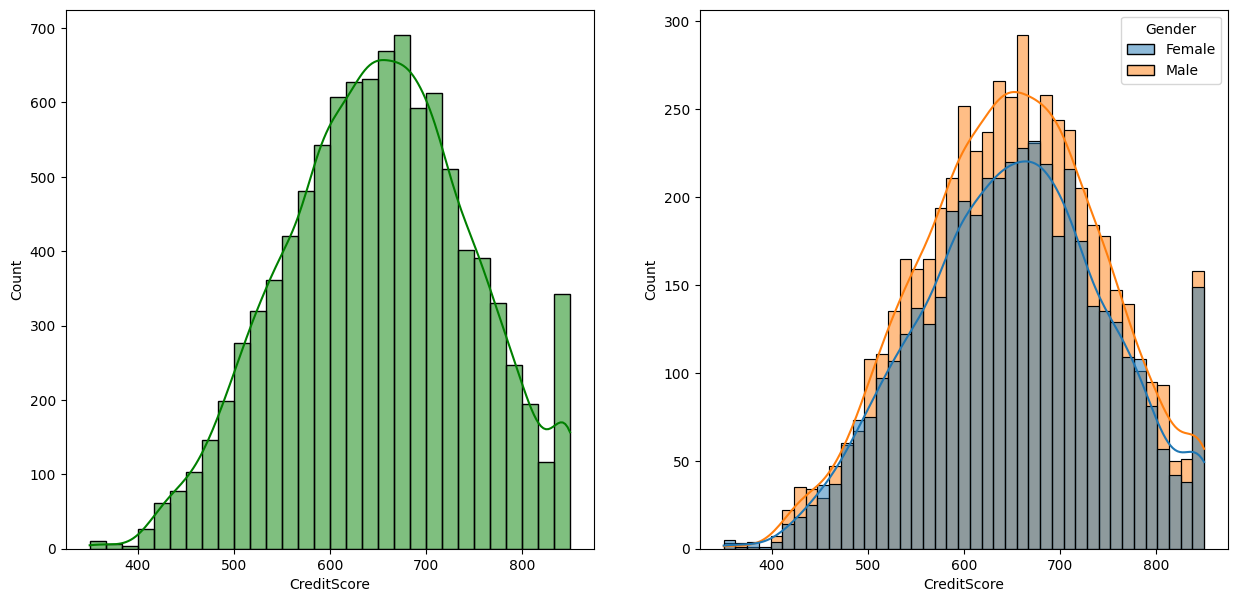

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='CreditScore',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='CreditScore',kde=True,hue='Gender')
plt.show()

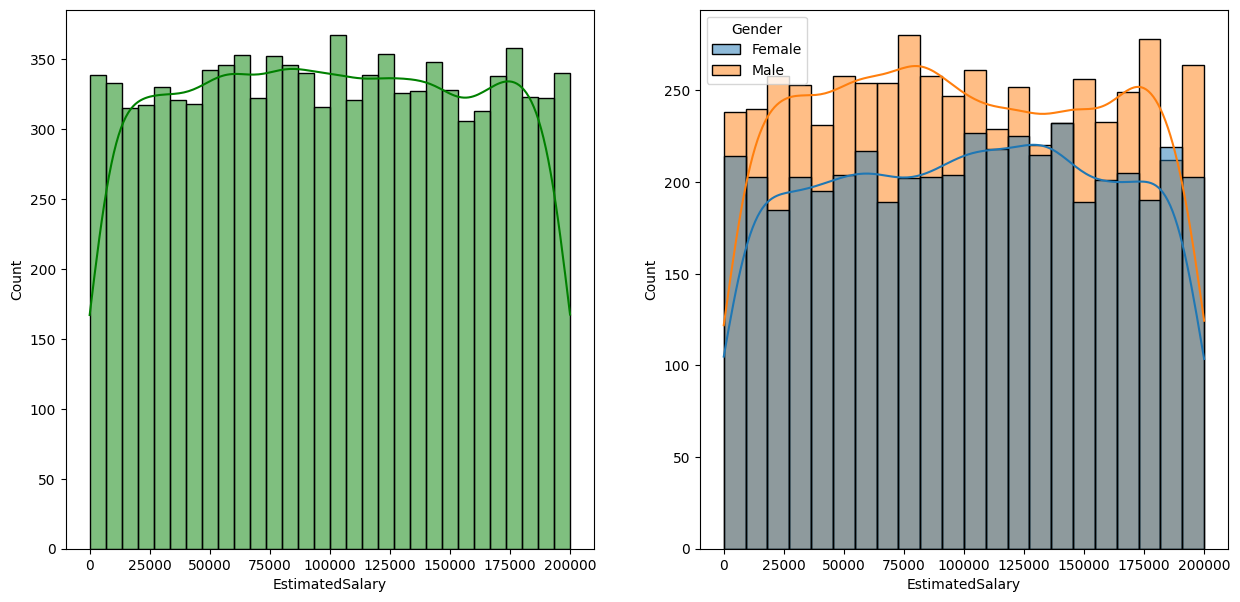

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='EstimatedSalary',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='EstimatedSalary',kde=True,hue='Gender')
plt.show()

Visualize customer churn by Gender

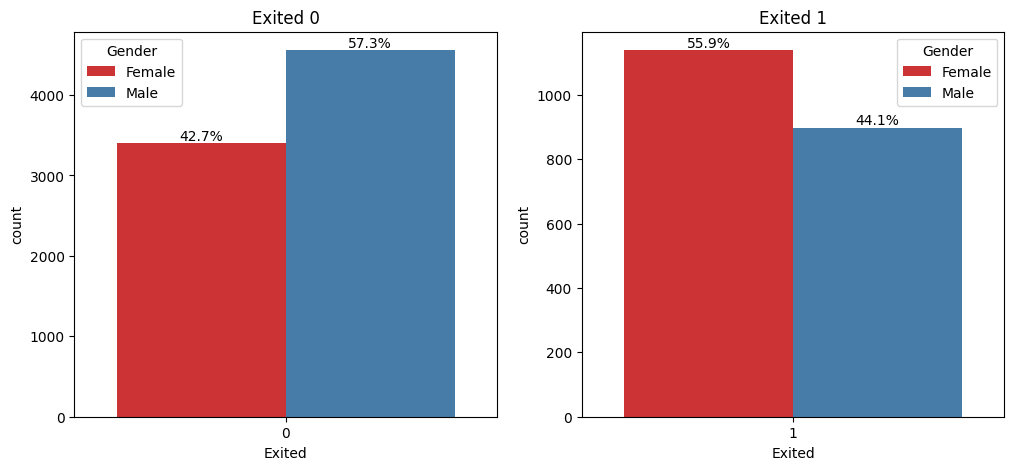

In [22]:
# Define a color palette for consistent legend categories
palette = sns.color_palette('Set1')

# Filter data for each Exited
df_Exited0 = df[df['Exited'] == 0]
df_Exited1 = df[df['Exited'] == 1]

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Exited 0 with palette
sns.countplot(data=df_Exited0, x='Exited', hue='Gender', ax=ax1, palette=palette)
total_Exited0 = df_Exited0['Gender'].value_counts().sum()
ax1.set_title('Exited 0')

# Annotate bars for Exited 0
for container in ax1.containers:
    heights = [p.get_height() for p in container.patches]
    labels = [f'{(h/total_Exited0 * 100):0.1f}%' for h in heights]
    ax1.bar_label(container, labels=labels)

# Plot for Exited 1 using the same palette
sns.countplot(data=df_Exited1, x='Exited', hue='Gender', ax=ax2, palette=palette)
total_Exited1 = df_Exited1['Gender'].value_counts().sum()
ax2.set_title('Exited 1')

# Annotate bars for Exited 1
for container in ax2.containers:
    heights = [p.get_height() for p in container.patches]
    labels = [f'{(h/total_Exited1 * 100):0.1f}%' for h in heights]
    ax2.bar_label(container, labels=labels)

# Improve legend clarity (optional)
handles, labels = ax2.get_legend_handles_labels()  # Get legend elements from second plot
ax1.legend(handles, labels, title='Gender')  # Add legend to first plot


plt.show()


#####  Insights
- Male customers tend to have higher Credit Scores and Salaries than female Customers.
-Credit scores shows a slightly left skewed normal distribution
-Estimated salary displays a uniform distribution
-Customers who churned are 55% female

Next we will look at what insights we can gather from the geography column

In [23]:
# Count occurrences of each value in "Geography"
reason_counts = df['Geography'].value_counts()

# Create the pie chart
fig = px.pie(reason_counts, values=reason_counts.values, names=reason_counts.index, title='Country Counts')
#update traces and hide legend
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    showlegend=False
)

# Display the pie chart
fig.show()

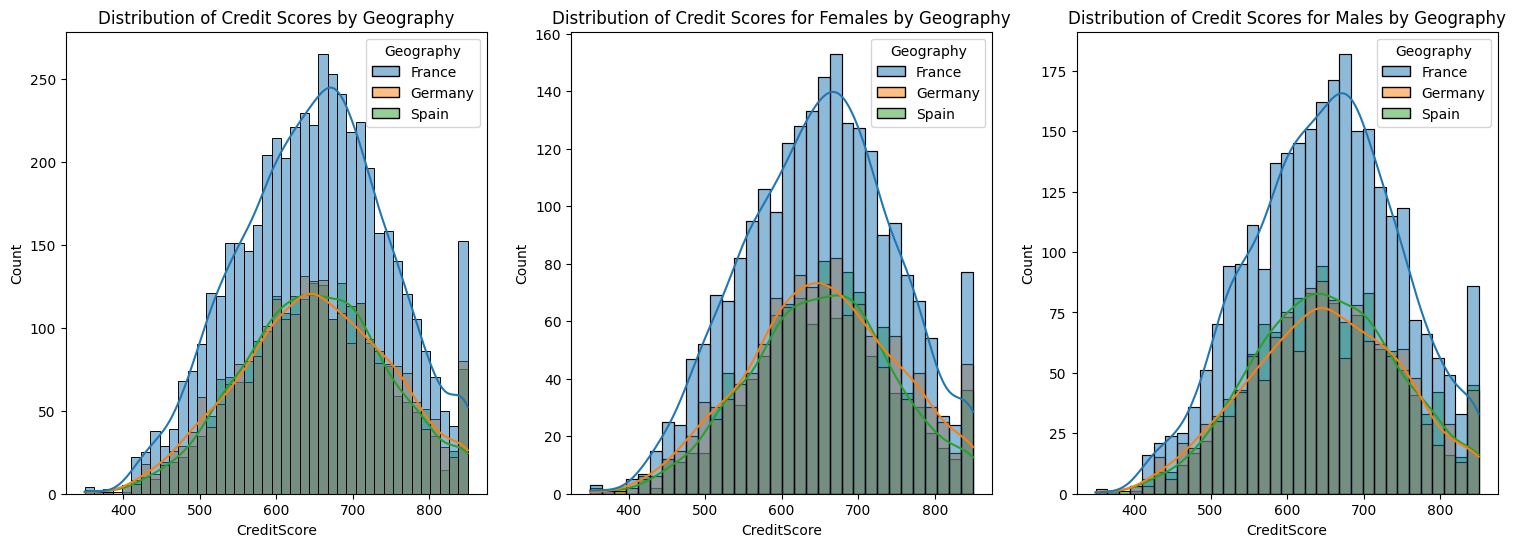

In [24]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='CreditScore', kde=True, hue='Geography', hue_order=['France', 'Germany', 'Spain'])
plt.title('Distribution of Credit Scores by Geography')

plt.subplot(142)
sns.histplot(data=df[df['Gender'] == 'Female'], x='CreditScore', kde=True, hue='Geography', hue_order=['France', 'Germany', 'Spain'])
plt.title('Distribution of Credit Scores for Females by Geography')

plt.subplot(143)
sns.histplot(data=df[df['Gender'] == 'Male'], x='CreditScore', kde=True, hue='Geography', hue_order=['France', 'Germany', 'Spain'])
plt.title('Distribution of Credit Scores for Males by Geography')

plt.show()


In [25]:
#create a dataframe of each Exited with their first interaction count
Geography = df.groupby(['Exited', 'Geography']).size().unstack()

# Get percentages for each category for each Exited
percentages = (Geography / Geography.sum(axis=0)) * 100

# Print the result
print(round(percentages),2)
# Reset index to convert multi-index DataFrame to a flat DataFrame
percentages = percentages.reset_index()
# Melt the DataFrame to long format for plotting
melted_percentages = percentages.melt(id_vars='Exited', var_name='Geography', value_name='Percentage')

# Create a bar chart with Plotly
fig = px.bar(melted_percentages, x='Geography', y='Percentage', color='Exited', barmode='group',
             title='Percentage of Exits for Each Country')
fig.update_layout(xaxis_title='Geography', yaxis_title='Percentage')


# Add percentage labels
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Update x-axis labels rotation for better readability
fig.update_xaxes(tickangle=45)

Geography  France  Germany  Spain
Exited                           
0           84.00    68.00  83.00
1           16.00    32.00  17.00 2


#####  Insights
- Distributions are very similar for every country and gender
- France and male have higher value counts.
-Germany has the highest customer churn ratio, double that of France and Spain

Next we will analyze how age affects churn

In [26]:
# Define age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create age bins column
df['Age_Bins'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate value counts and percentage for each age bin
age_counts = df['Age_Bins'].value_counts()
age_percentages = (age_counts / len(df)) * 100

# Create a DataFrame to hold counts and percentages
age_data = pd.DataFrame({'Age_Bins': age_counts.index, 'Counts': age_counts.values, 'Percentage': age_percentages.values})

# Get the category with the most value counts
most_common_age = age_counts.idxmax()

# Create a bar chart with Plotly
fig = px.bar(age_data, x='Age_Bins', y='Counts', text='Percentage', title='Distribution of Age Bins',
             color='Age_Bins', color_discrete_sequence=['lightgray' if age != most_common_age else 'purple' for age in age_data['Age_Bins']])

# Add percentage labels
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Update x-axis labels rotation for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


In [27]:
# Calculate churn ratio for each age group
churn_ratio = df.groupby('Age_Bins')['Exited'].mean() * 100

# Create a bar plot with Plotly
fig = px.bar(churn_ratio, x=churn_ratio.index, y=churn_ratio.values,
             labels={'x': 'Age Group', 'y': 'Churn Ratio (%)'},
             title='Churn Ratio by Age Group',
             color=churn_ratio.values,  # Use churn ratio values for color
             color_continuous_scale='reds')  # Adjust color scale to reds

# Update x-axis labels rotation for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


#####  Insights
- The predominant age category for the bank is 31 to 40 years of age. They encompass 43% of all customers
-The highest churn ratio are for customers between the age of 41 to 70, particularly 51-60 have a churn ratio of over 56%.
This could suggest these older age groups might have trouble with the apps or technology the bank utilizes.

We will analyze if credit score affects churn

In [28]:
# Calculate the average CreditScore amount for each value of Exited
avg_CreditScore_by_Exited = df.groupby('Exited')['CreditScore'].mean().reset_index()

# Create a bar chart with Plotly
fig = px.bar(avg_CreditScore_by_Exited, x='Exited', y='CreditScore', color='Exited',
             labels={'Exited': 'Default Status', 'CreditScore': 'Average CreditScore Amount'},
             title='Average CreditScore Amount by Default Status')
# Show the value ticks on the bars
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['0 (Non-Default)', '1 (Default)']))

# Show the plot
fig.show()

#####  Insights
- Both churned customers and non churned exhibit the same average credit score, so no meaningful insights can be observed

###Next we will analize the Tenure with the bank and Number of Products to see how they relate to customer churn

In [29]:
proportion_by_value = df.groupby(['Tenure', 'NumOfProducts'])['Exited'].mean().reset_index()

# Rename the column to represent proportion
proportion_by_value = proportion_by_value.rename(columns={'Exited': 'Proportion Defaulted'})

# Calculate proportion of 'Exited' == 0
proportion_by_value['Proportion Repaid'] = 1 - proportion_by_value['Proportion Defaulted']

# Display the DataFrame
proportion_by_value

,Tenure,NumOfProducts,Proportion Defaulted,Proportion Repaid
0,0,1,0.28,0.72
1,0,2,0.13,0.87
2,0,3,1.00,0.00
3,1,1,0.30,0.70
4,1,2,0.08,0.92
5,1,3,0.78,0.22
6,1,4,1.00,0.00
7,2,1,0.30,0.70
8,2,2,0.06,0.94
9,2,3,0.81,0.19


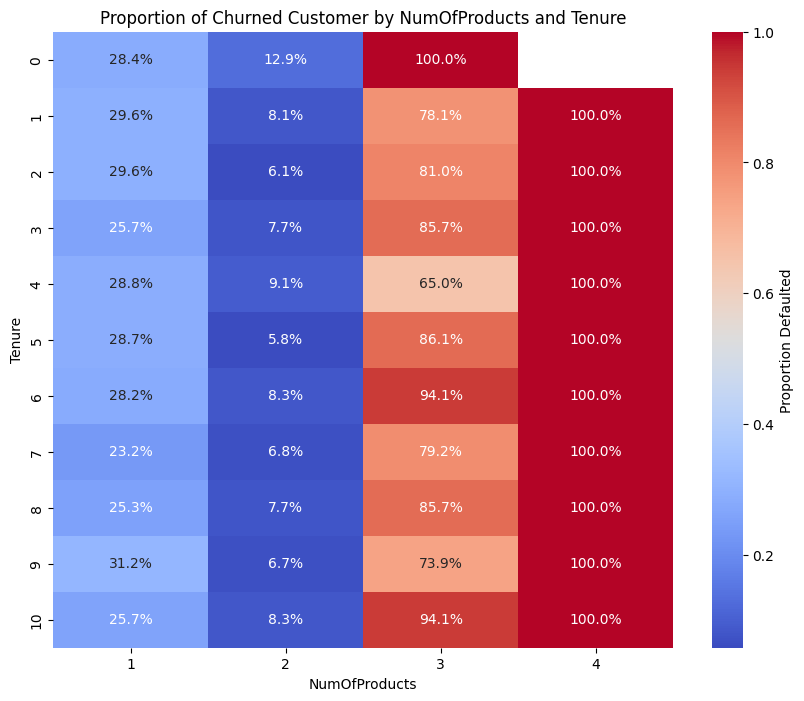

In [30]:
heatmap_data = proportion_by_value.pivot(index='Tenure', columns='NumOfProducts', values='Proportion Defaulted')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1%", cbar_kws={'label': 'Proportion Defaulted'})
plt.title('Proportion of Churned Customer by NumOfProducts and Tenure')
plt.xlabel('NumOfProducts')
plt.ylabel('Tenure')
plt.show()

In [31]:
# Calculate churn ratio for each NumOfProducts
churn_ratio = df.groupby('NumOfProducts')['Exited'].mean() * 100

# Create a bar plot with Plotly
fig = px.bar(churn_ratio, x=churn_ratio.index, y=churn_ratio.values,
             labels={'x': 'NumOfProducts', 'y': 'Churn Ratio (%)'},
             title='Churn Ratio by NumOfProducts',
             color=churn_ratio.values,  # Use churn ratio values for color
             color_continuous_scale='reds')  # Adjust color scale to reds

# Update x-axis labels rotation for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


##Insights

-Tenure doesnt show any particular pattern related to churn
-Number of products clearly shows that the higher the number of products a customer has with the bank the higher the probability with churn. This could suggest that the customers tried several products looking to find a viable solution, but found none.
-However oddly enough, the customers that had 2 products had a lower churn ratio than the ones who had 1.

Next we will analyze the average estimated salary for each churn result

In [32]:
# Calculate the average EstimatedSalary amount for each value of Exited
avg_EstimatedSalary_by_Exited = df.groupby('Exited')['EstimatedSalary'].mean().reset_index()

# Create a bar chart with Plotly
fig = px.bar(avg_EstimatedSalary_by_Exited, x='Exited', y='EstimatedSalary', color='Exited',
             labels={'Exited': 'Default Status', 'EstimatedSalary': 'Average EstimatedSalary Amount'},
             title='Average EstimatedSalary Amount by Churn Status')
# Show the value ticks on the bars
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['0 (Non-Default)', '1 (Default)']))

# Show the plot
fig.show()

The average salary is very similar for both

Perhaps if the customer has a credit card with the bank influences their churn ratio

In [33]:
# Calculate churn ratio for each age group
churn_ratio = df.groupby('HasCrCard')['Exited'].mean() * 100

# Create a bar plot with Plotly
fig = px.bar(churn_ratio, x=churn_ratio.index, y=churn_ratio.values,
             labels={'x': 'Credit CARD', 'y': 'Churn Ratio (%)'},
             title='Churn Ratio by Credit card Group',
             color=churn_ratio.values,  # Use churn ratio values for color
             color_continuous_scale='reds')  # Adjust color scale to reds

# Update x-axis labels rotation for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

Both types of customer have the same churn ratio in this case

Next we will create a box plot to visualize available balance for each churn group.

<Axes: xlabel='Balance'>

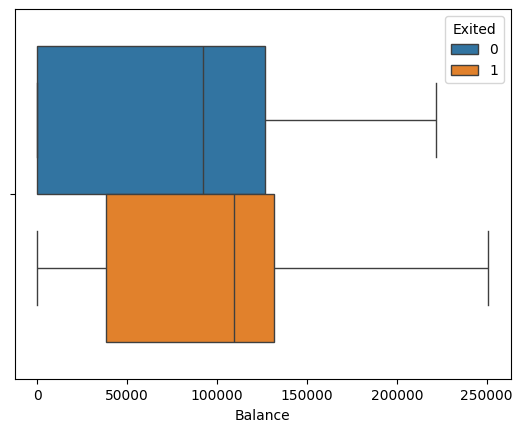

In [34]:
sns.boxplot(x="Balance", hue="Exited", data=df)

#### Insights
- From the above plot we can see that customers who churned had a slightly higher balance available, and their available balance starts at higher number. For example, no churned customers had a balance lowe than about 45,000

#### Multivariate analysis

In [35]:
df_filtered = df.dropna(subset=['Geography'])


# Group by 'Geography' and 'NumOfProducts' and sum 'Exited' values
df_filtered = df_filtered.groupby(['Geography', 'NumOfProducts']).agg({'Exited': 'mean', 'Balance': 'mean'}).reset_index()

# Create the treemap figure using Plotly Express for the filtered DataFrame
fig_filtered = px.treemap(df_filtered, path=['Geography', 'NumOfProducts'], values='Exited',
                          color='Balance', hover_data=['Exited'],
                          color_continuous_scale='RdBu',
                          color_continuous_midpoint=df_filtered['Balance'].mean())
fig_filtered.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig_filtered.show()

In [36]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specified Age_Bins
df_filtered = df.dropna(subset=['Geography'])

# Define the age bins to include
age_bins_to_include = ['41-50', '51-60', '61-70']

# Filter the DataFrame to include only the specified Age_Bins
df_filtered = df_filtered[df_filtered['Age_Bins'].isin(age_bins_to_include)]

# Group by 'Geography' and 'Age_Bins' and calculate mean 'Exited' and 'Balance'
df_filtered = df_filtered.groupby(['Geography', 'Age_Bins']).agg({'Exited': 'mean', 'Balance': 'mean'}).reset_index()

# Create the treemap figure using Plotly Express
fig_filtered = px.treemap(df_filtered, path=['Geography', 'Age_Bins'], values='Exited',
                          color='Balance', hover_data=['Exited'],
                          color_continuous_scale='RdBu',
                          color_continuous_midpoint=df_filtered['Balance'].mean())

# Update layout and display the plot
fig_filtered.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig_filtered.show()


This tree plots confirms a lot of our previous analysis. Like the 51-60 age group having the highest churn rates.
Germany also has more churns than Spain and France.
Finally, we learned from this tree map that customers is Germany have much higher balances.

#### 4.4.6 CHECKING OUTLIERS

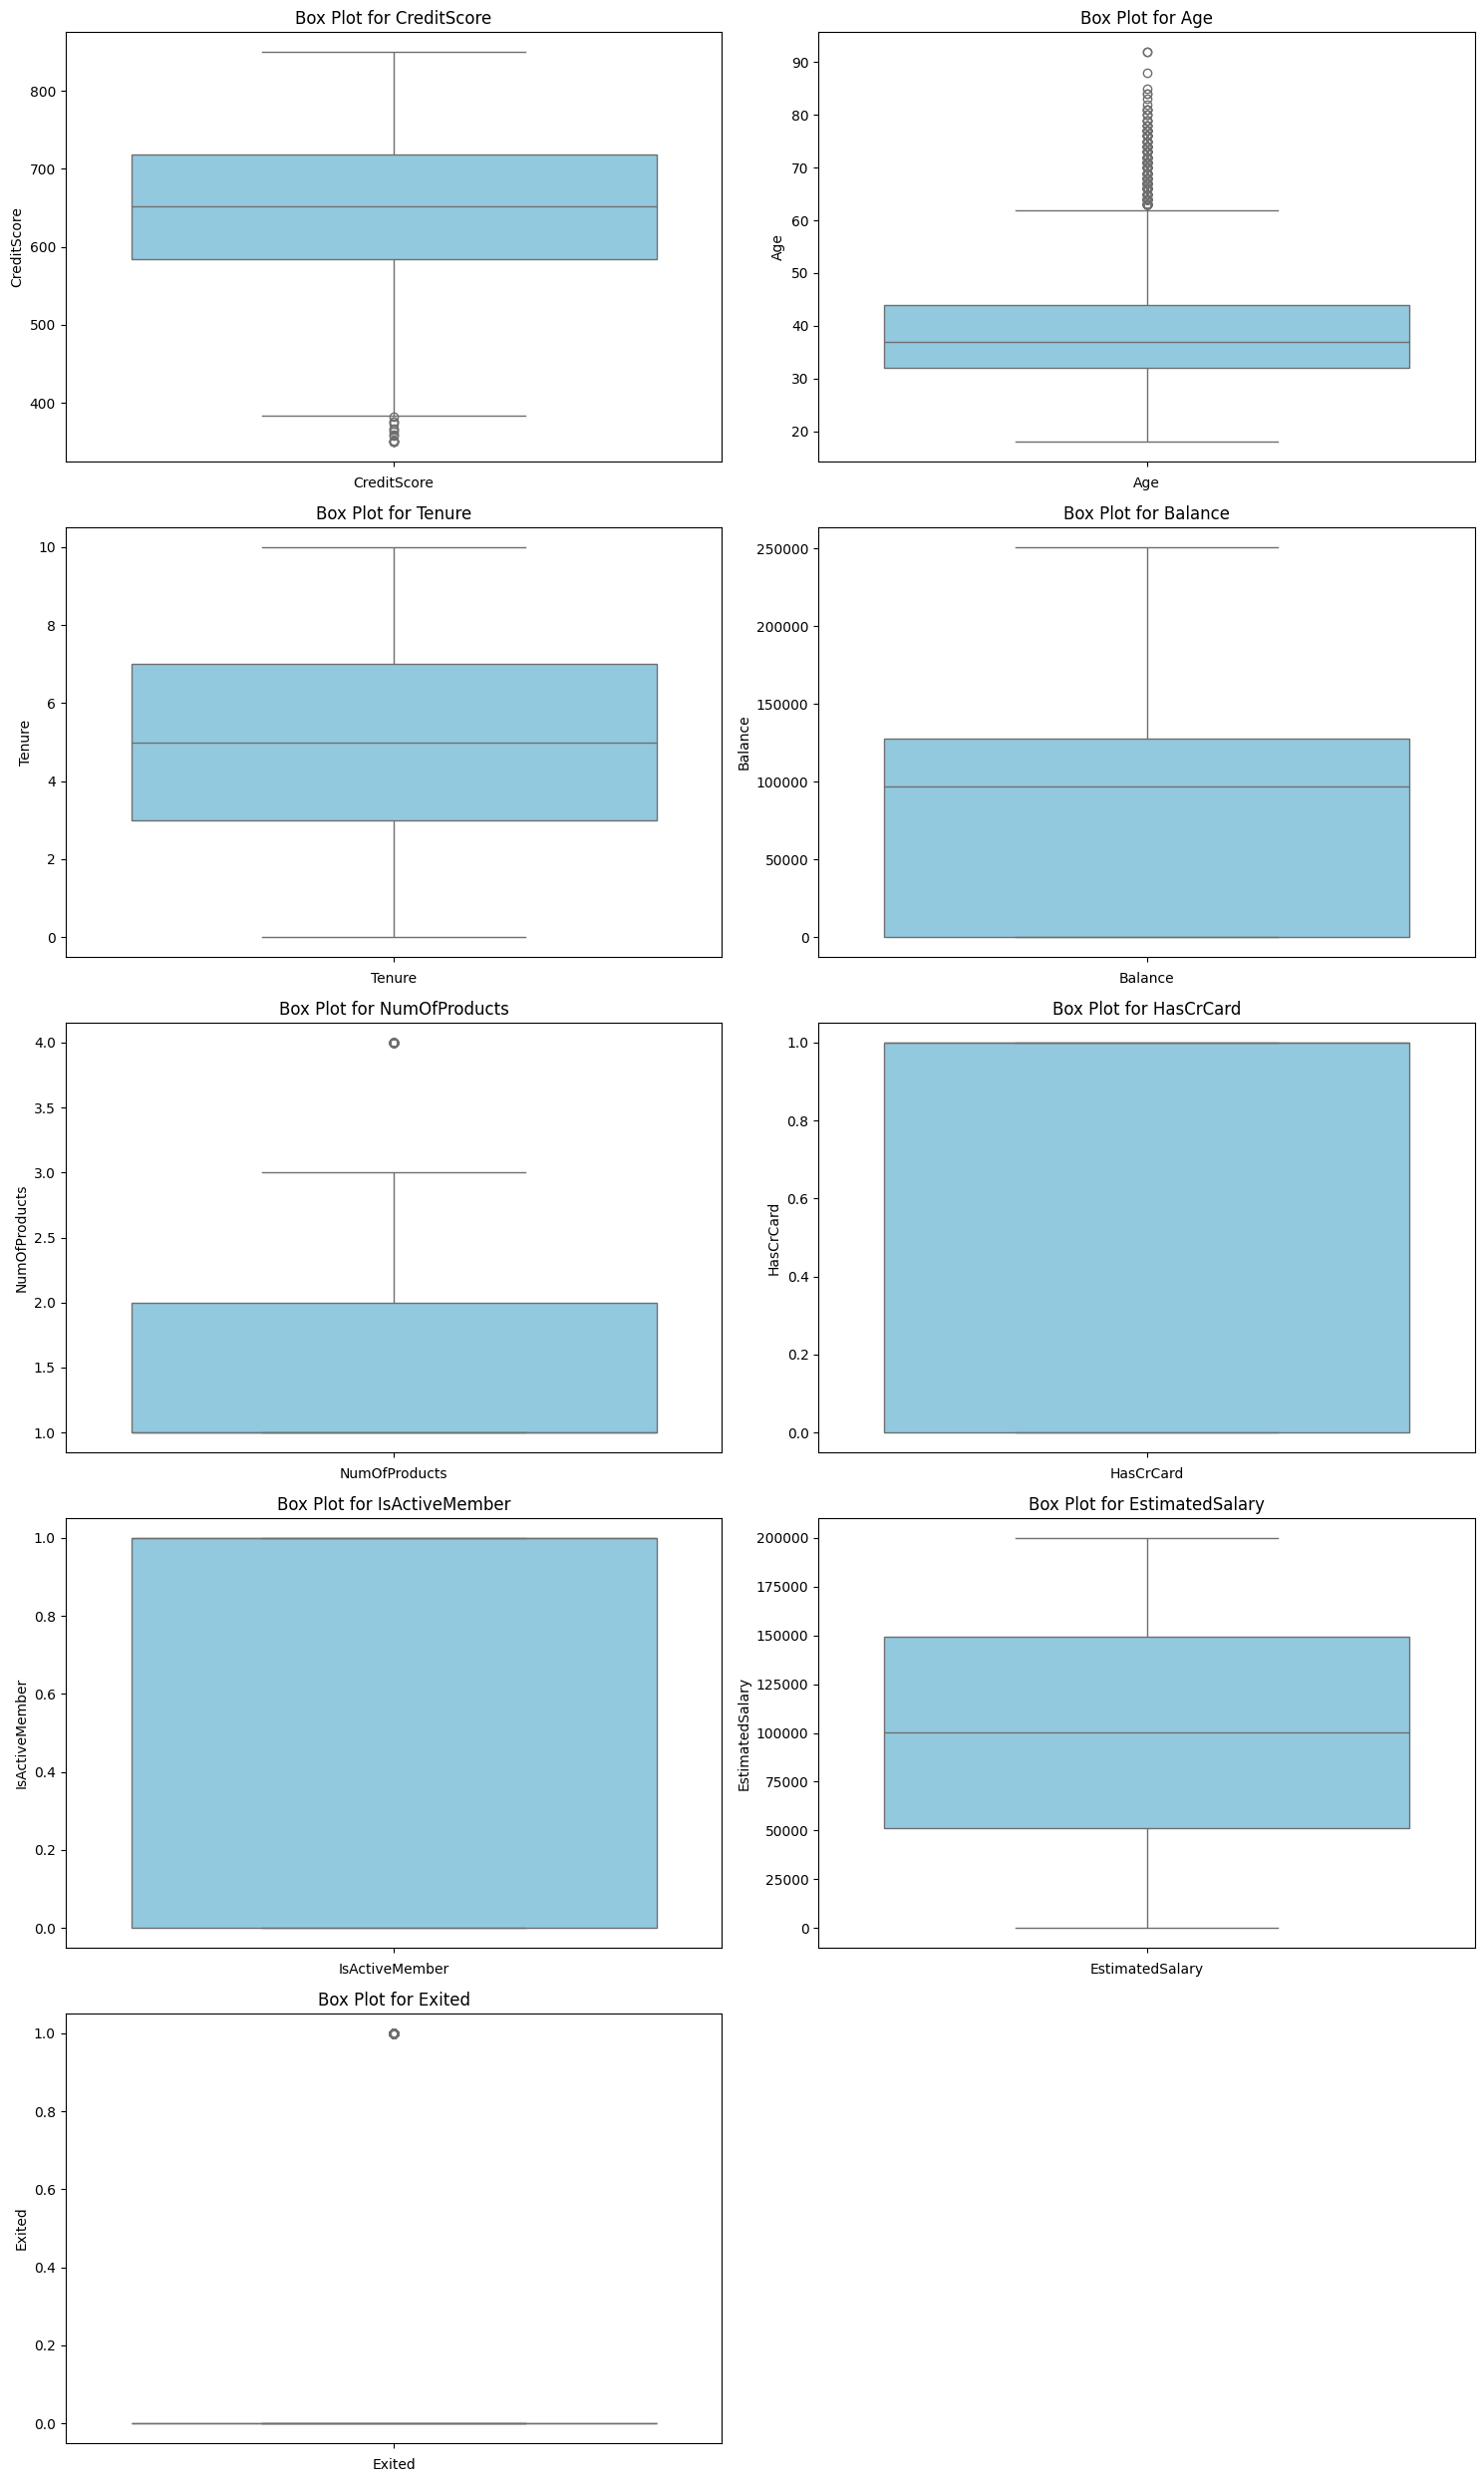

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns for the subplot grid
num_cols = len(numerical_columns.columns)
num_rows = (num_cols + 1) // 2

# Set up the figure with matplotlib
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numerical column
for i, column in enumerate(numerical_columns.columns):
    # Create a box plot for the column
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


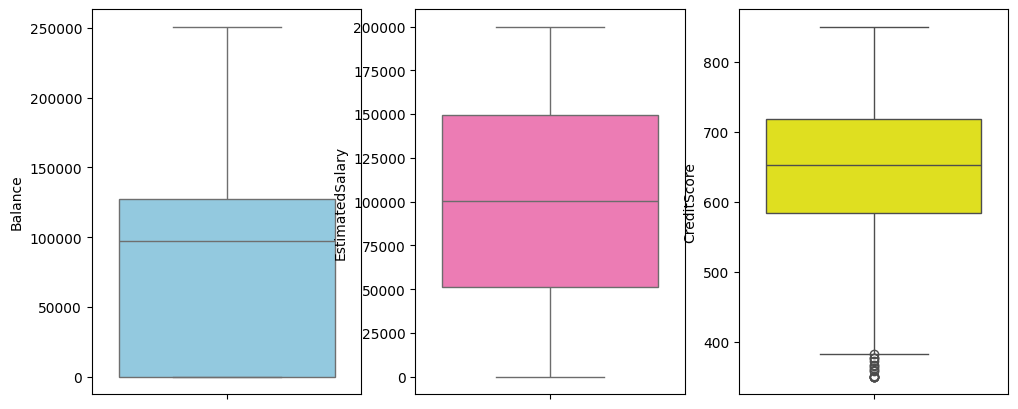

In [38]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Balance'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['EstimatedSalary'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['CreditScore'],color='yellow')
plt.show()

#### Insights
- We will treat outliers for the numerical columns that have a wider range of values which are: Balance, Estimated Salary and Credit Score.

In [39]:


# Create a DataFrame to hold z-scores for each column
zscore_df = pd.DataFrame()

# Calculate z-scores for each column and add them to the DataFrame
zscore_df['Balance_zscore'] = (df['Balance'] - df['Balance'].mean()) / df['Balance'].std()
zscore_df['EstimatedSalary_zscore'] = (df['EstimatedSalary'] - df['EstimatedSalary'].mean()) / df['EstimatedSalary'].std()
zscore_df['CreditScore_zscore'] = (df['CreditScore'] - df['CreditScore'].mean()) / df['CreditScore'].std()

# Show the DataFrame
print(zscore_df.head())


   Balance_zscore  EstimatedSalary_zscore  CreditScore_zscore
0           -1.23                    0.02               -0.33
1            0.12                    0.22               -0.44
2            1.33                    0.24               -1.54
3           -1.23                   -0.11                0.50
4            0.79                   -0.37                2.06


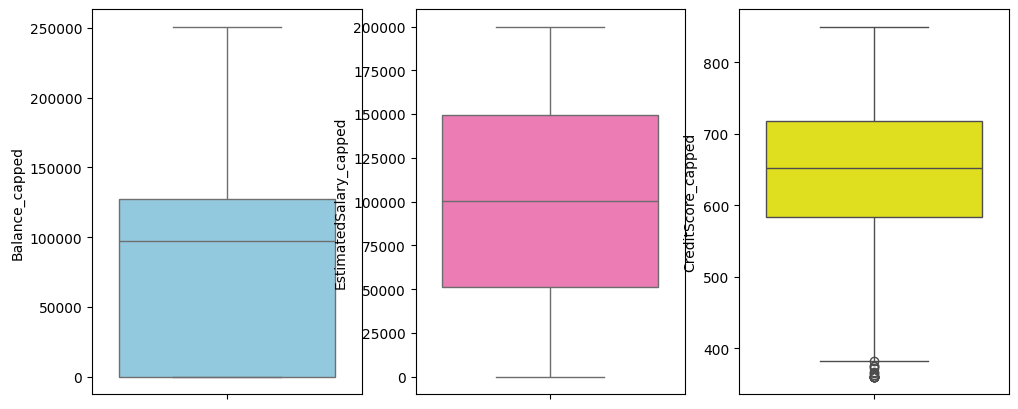

In [40]:
# Treat outliers by capping them at 3 standard deviations
stdv_limit = 3
df['Balance_capped'] = np.clip(df['Balance'], df['Balance'].mean() - stdv_limit * df['Balance'].std(), df['Balance'].mean() + stdv_limit * df['Balance'].std())
df['EstimatedSalary_capped'] = np.clip(df['EstimatedSalary'], df['EstimatedSalary'].mean() - stdv_limit * df['EstimatedSalary'].std(), df['EstimatedSalary'].mean() + stdv_limit * df['EstimatedSalary'].std())
df['CreditScore_capped'] = np.clip(df['CreditScore'], df['CreditScore'].mean() - stdv_limit * df['CreditScore'].std(), df['CreditScore'].mean() + stdv_limit * df['CreditScore'].std())

# Plot boxplots for the capped columns
plt.subplots(1,3,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Balance_capped'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['EstimatedSalary_capped'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['CreditScore_capped'],color='yellow')
plt.show()

In [42]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bins,Balance_capped,EstimatedSalary_capped,CreditScore_capped
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50,0.00,101348.88,619.00
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50,83807.86,112542.58,608.00
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50,159660.80,113931.57,502.00
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40,0.00,93826.63,699.00
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50,125510.82,79084.10,850.00


In [43]:
# Create a new DataFrame without z-score columns and original non-capped columns
df = df.drop([ 'Balance', 'EstimatedSalary', 'CreditScore'], axis=1)

# Show the new DataFrame
print(df.head())


  Geography  Gender  Age  Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
0    France  Female   42       2              1          1               1   
1     Spain  Female   41       1              1          0               1   
2    France  Female   42       8              3          1               0   
3    France  Female   39       1              2          0               0   
4     Spain  Female   43       2              1          1               1   

   Exited Age_Bins  Balance_capped  EstimatedSalary_capped  CreditScore_capped  
0       1    41-50            0.00               101348.88              619.00  
1       0    41-50        83807.86               112542.58              608.00  
2       1    41-50       159660.80               113931.57              502.00  
3       0    31-40            0.00                93826.63              699.00  
4       0    41-50       125510.82                79084.10              850.00  


### 5. Conclusions
- The higher the number of products a customer uses, the more likely he/she is to leave the bank
-People between the age group of 51-60 have the highest churn rate
-Germany has the highest churn rate out of all countries
-Females are more likely to churn than males